### Librerias

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Parametros de la distribucion Poisson

In [116]:
# Parámetro de la distribución Poisson
lamda = 5
mu = lamda
sigma = lamda**0.5

# Rango de valores para la distribución original
x = np.arange(0, 16)
dist_poisson_original = poisson(lamda)
pmf_original = dist_poisson_original.pmf(x)
cdf_original = dist_poisson_original.cdf(x)

## Graficar PDF Y CDF de la Poisson

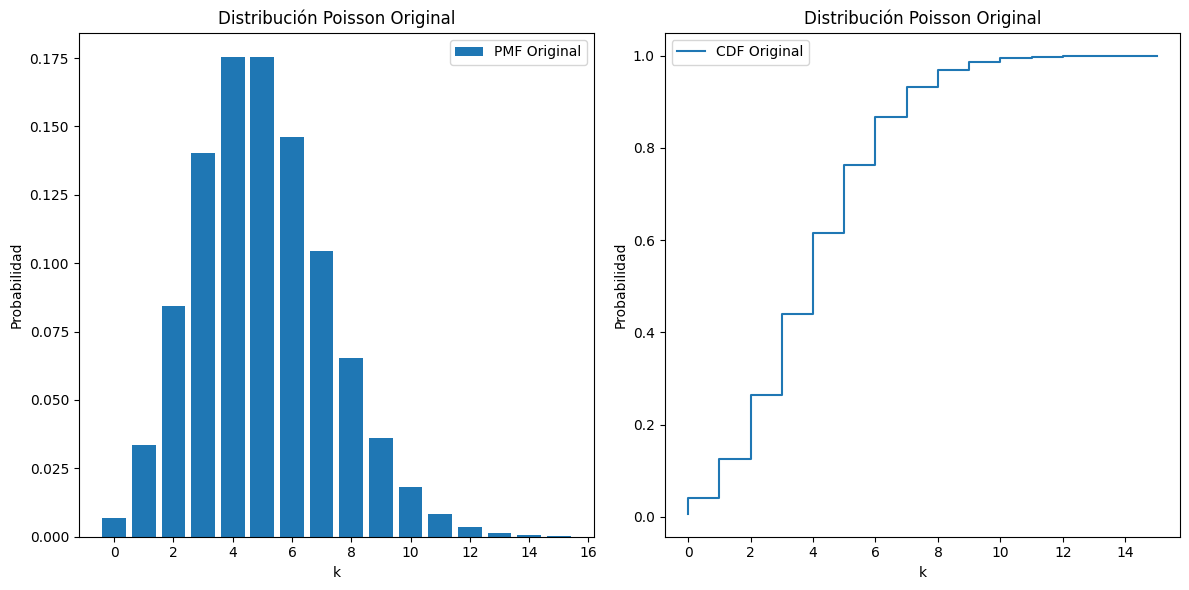

In [117]:
# Graficar la PMF original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, pmf_original, label="PMF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x, cdf_original, label="CDF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.tight_layout()
plt.show()

## Truncamiento con valores absolutos

In [118]:
# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento, por ejemplo, de k = 3 a k = 10
k_min = 3
k_max = 10

cdf_min = dist_poisson_original.cdf(k_min)
cdf_max = dist_poisson_original.cdf(k_max)
norm_const = cdf_max - cdf_min  # constante de normalización

## Grafica de PFD y CDF truncada

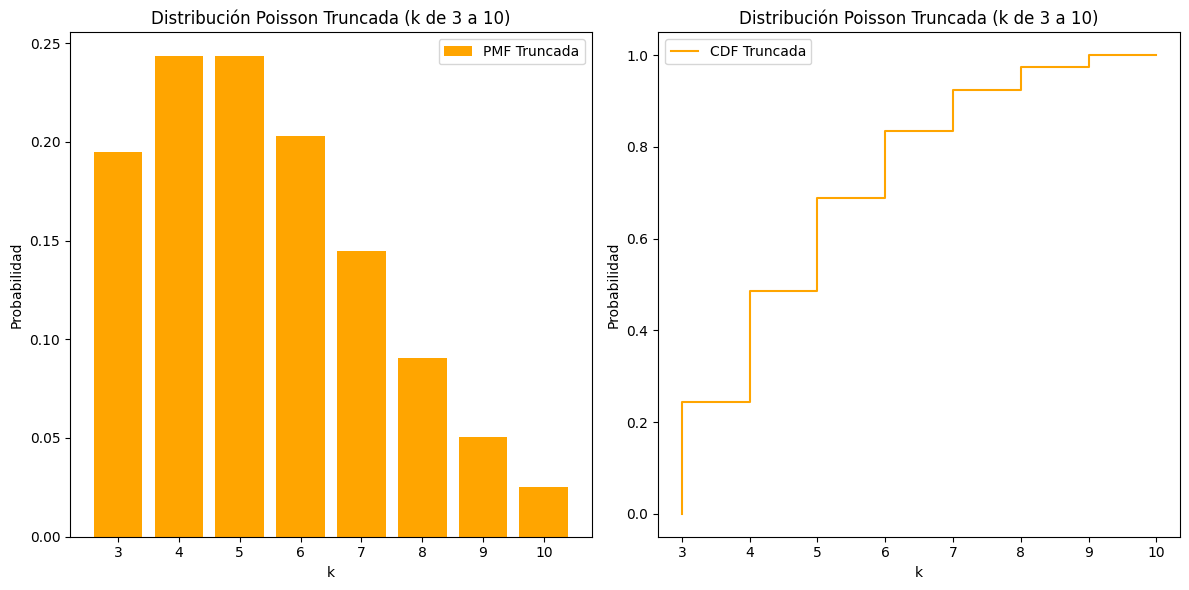

In [119]:
x_trunc = np.linspace(k_min, k_max, k_max-k_min+1) # rango de valores truncados
pdf_trunc = dist_poisson_original.pmf(x_trunc) / norm_const
cdf_trunc = (dist_poisson_original.cdf(x_trunc) - dist_poisson_original.cdf(k_min)) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pdf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

## Función para calcular la CDF truncada

In [120]:
def cdf_truncada(k):
    if k < k_min:
        return 0
    elif k > k_max:
        return 1
    else:
        return (dist_poisson_original.cdf(k) - cdf_min) / norm_const

## Propiedades para calcular las probabilidades de una distribucion discreta

1. $P(a<=x<=b)$ = $F(b)$ - $F(a^-)$
2. $P(a<x<b)$ = $F(b^-)$ - $F(a)$
3. $P(a<=x<b)$ = $F(b^-)$ - $F(a^-)$
4. $P(a<x<=b)$ = $F(b)$ - $F(a)$
5. $P(x>=a)$ = 1 - $F(a^-)$
6. $P(x=a)$ = $F(a)$ - $F(a^-)$

## Calculos de probabilidad

In [129]:
print(dist_poisson_original.cdf(8))
print(dist_poisson_original.cdf(3))

0.9319063652781516
0.2650259152973615


In [121]:
# probabilidad con poisson original entre 4 y 8
p_original = dist_poisson_original.cdf(8) - dist_poisson_original.cdf(3)
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

# Calcular la probabilidad en la Poisson truncada para k entre 4 y 8
p_truncada = cdf_truncada(8) - cdf_truncada(3)
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_truncada)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807901
Probabilidad en Poisson truncada (k entre 4 y 8): 0.9245806685169544


## Truncamiento con Desviaciones estándar

In [122]:
def calc_desv_estandar(x, mu = mu, sigma = sigma):
    a = (mu - sigma*x)
    b = (mu + sigma*x)
    return a, b

k_min, k_max = calc_desv_estandar(2)

k_min = int(k_min)
k_max = int(k_max)

print(k_min, k_max)

cdf_min = dist_poisson_original.cdf(k_min)
cdf_max = dist_poisson_original.cdf(k_max)
norm_const = cdf_max - cdf_min  # constante de normalización

0 9


## Graficar PDF Y CDF de la triangular truncada

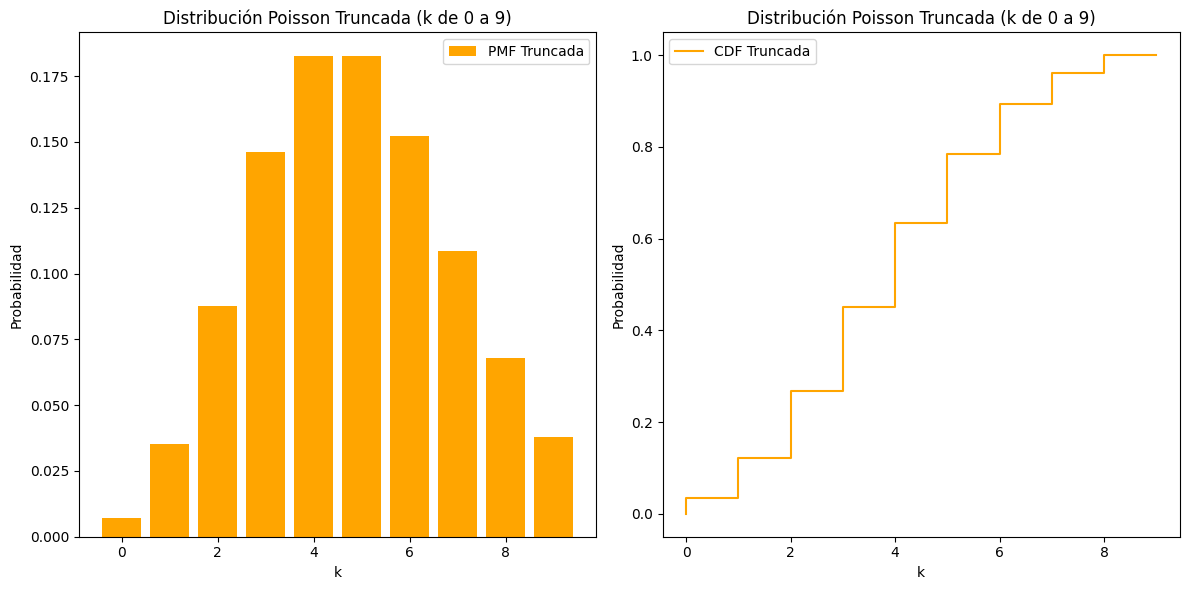

In [123]:
x_trunc = np.linspace(k_min, k_max, k_max-k_min+1) # rango de valores truncados
pdf_trunc = dist_poisson_original.pmf(x_trunc) / norm_const
cdf_trunc = (dist_poisson_original.cdf(x_trunc) - dist_poisson_original.cdf(k_min)) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pdf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

## Calculos de probabilidad

In [124]:
# probabilidad con poisson original entre 4 y 8
p_original = dist_poisson_original.cdf(8) - dist_poisson_original.cdf(3)
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

# Calcular la probabilidad en la Poisson truncada para k entre 4 y 8
p_truncada = cdf_truncada(8) - cdf_truncada(3)
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_truncada)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807901
Probabilidad en Poisson truncada (k entre 4 y 8): 0.6936310271605468


## Truncamiento con Percentiles

In [ ]:
# Calcular el percentil 10 y el percentil 95 de la distribución poisson
k_min = dist_poisson_original.ppf(0.10)
k_max = dist_poisson_original.ppf(0.95)

k_min = int(k_min)
k_max = int(k_max)

print(k_min, k_max)

cdf_min = dist_poisson_original.cdf(k_min)
cdf_max = dist_poisson_original.cdf(k_max)
norm_const = cdf_max - cdf_min  # constante de normalización

2 9


## Grafica de la PDF y CDF de la distribución Poisson

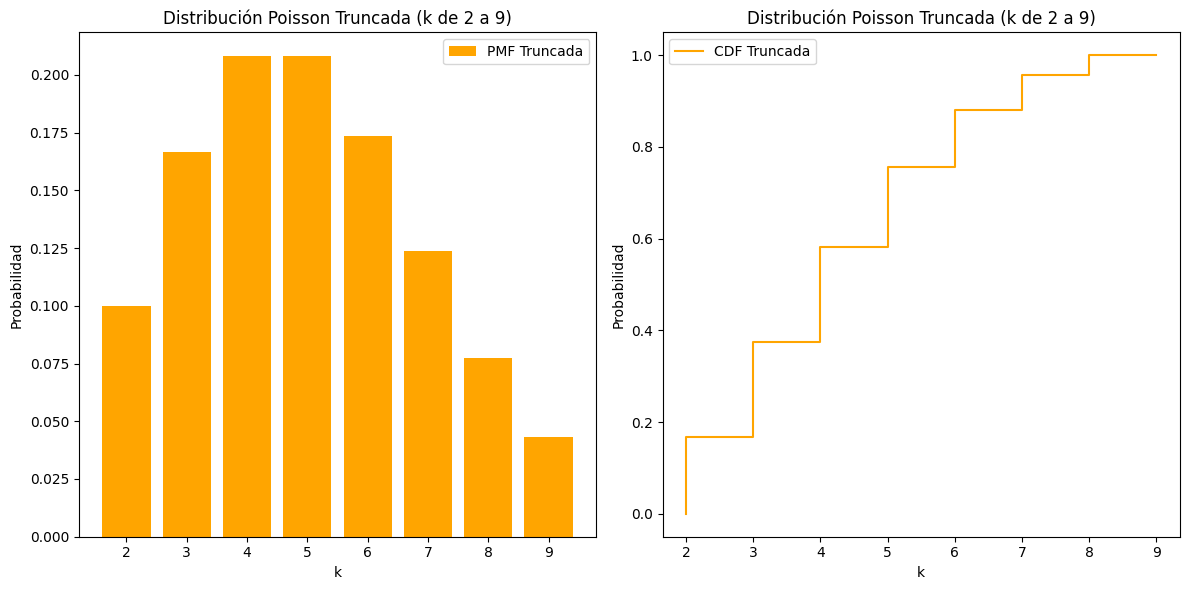

In [126]:
x_trunc = np.linspace(k_min, k_max, k_max-k_min+1) # rango de valores truncados
pdf_trunc = dist_poisson_original.pmf(x_trunc) / norm_const
cdf_trunc = (dist_poisson_original.cdf(x_trunc) - dist_poisson_original.cdf(k_min)) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pdf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

## Calculos de Probabilidad

In [127]:
# probabilidad con poisson original entre 4 y 8
p_original = dist_poisson_original.cdf(8) - dist_poisson_original.cdf(3)
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

# Calcular la probabilidad en la Poisson truncada para k entre 4 y 8
p_truncada = cdf_truncada(8) - cdf_truncada(3)
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_truncada)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807901
Probabilidad en Poisson truncada (k entre 4 y 8): 0.7905924111933527
